# **[Recommendation System](https://towardsdatascience.com/modern-recommendation-systems-with-neural-networks-3cc06a6ded2c)**


In [1]:
# importing libs
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [2]:
import tensorflow as tf
tf.__version__


'2.10.1'

# Products

In [3]:
# Products
dtf_products= pd.read_excel('data_movies.xlsx')
print(dtf_products.shape)
dtf_products.isna().sum()


(9742, 3)


movieId    0
title      0
genres     1
dtype: int64

In [4]:
dtf_products = dtf_products[~dtf_products["genres"].isna()]
dtf_products.shape

(9741, 3)

In [5]:
dtf_products.sample(5)

,movieId,title,genres
4604,6857,Ninja Scroll (JÃ»bei ninpÃ»chÃ´) (1995),Action|Adventure|Animation|Fantasy
1841,2448,Virus (1999),Horror|Sci-Fi
1127,1474,Jungle2Jungle (a.k.a. Jungle 2 Jungle) (1997),Children|Comedy
4397,6461,"Unforgiven, The (1960)",Drama|Western
5988,36537,Thumbsucker (2005),Comedy|Drama


In [6]:
dtf_products["product"] = range(0,len(dtf_products)) # what is this products ? ----> sequence m dalne k liye because movie_id isn't in sequence
dtf_products["name"] = dtf_products["title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())
dtf_products["date"] = dtf_products["title"].apply(lambda x: int(x.split("(")[-1].replace(")","").strip()) 
                                                             if "(" in x else np.nan)

dtf_products.sample(5)
dtf_products.isna().sum()

movieId     0
title       0
genres      0
product     0
name        0
date       12
dtype: int64

In [7]:
dtf_products[dtf_products.date.isna()]

,movieId,title,genres,product,name,date
6059,40697,Babylon 5,Sci-Fi,6059,Babylon 5,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,9031,Ready Player One,NaN
9091,143410,Hyena Road,(no genres listed),9091,Hyena Road,NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),9138,The Adventures of Sherlock Holmes and Doctor W...,NaN
9179,149334,Nocturnal Animals,Drama|Thriller,9179,Nocturnal Animals,NaN
9259,156605,Paterson,(no genres listed),9259,Paterson,NaN
9367,162414,Moonlight,Drama,9367,Moonlight,NaN
9448,167570,The OA,(no genres listed),9447,The OA,NaN
9514,171495,Cosmos,(no genres listed),9513,Cosmos,NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),9514,Maria Bamford: Old Baby,NaN


In [8]:
## add features
dtf_products["date"] = dtf_products["date"].fillna(9999) # jaha khali hai waha ye bhar do, kyu kra pata nhi ?????
dtf_products["old"] = dtf_products["date"].apply(lambda x: 1 if x < 2000 else 0) # 2000 se phle ki movies sab purani


In [9]:
dtf_products[dtf_products.movieId==176601]

,movieId,title,genres,product,name,date,old
9611,176601,Black Mirror,(no genres listed),9610,Black Mirror,9999.0,0


In [10]:
dtf_products.head(10)

,movieId,title,genres,product,name,date,old
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Toy Story,1995.0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,Jumanji,1995.0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2,Grumpier Old Men,1995.0,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,Waiting to Exhale,1995.0,1
4,5,Father of the Bride Part II (1995),Comedy,4,Father of the Bride Part II,1995.0,1
5,6,Heat (1995),Action|Crime|Thriller,5,Heat,1995.0,1
6,7,Sabrina (1995),Comedy|Romance,6,Sabrina,1995.0,1
7,8,Tom and Huck (1995),Adventure|Children,7,Tom and Huck,1995.0,1
8,9,Sudden Death (1995),Action,8,Sudden Death,1995.0,1
9,10,GoldenEye (1995),Action|Adventure|Thriller,9,GoldenEye,1995.0,1


In [11]:
dtf_products.movieId==dtf_products['product'] +1

0        True
1        True
2        True
3        True
4        True
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Length: 9741, dtype: bool

In [12]:
dtf_products.tail()

,movieId,title,genres,product,name,date,old
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9736,Black Butler: Book of the Atlantic,2017.0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9737,No Game No Life: Zero,2017.0,0
9739,193585,Flint (2017),Drama,9738,Flint,2017.0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9739,Bungo Stray Dogs: Dead Apple,2018.0,0
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,9740,Andrew Dice Clay: Dice Rules,1991.0,1


In [13]:
dtf_products.iloc[9740]

movieId                                 193609
title      Andrew Dice Clay: Dice Rules (1991)
genres                                  Comedy
product                                   9740
name              Andrew Dice Clay: Dice Rules
date                                    1991.0
old                                          1
Name: 9741, dtype: object

# Users

In [14]:
# Users
dtf_users = pd.read_excel("data_movies.xlsx", sheet_name="users").head(10000) # esne 10k hi entries li hai, maybe for simplicity 
# dtf_users = pd.read_excel("data_movies.xlsx", sheet_name="users")  # 100836 ---> entries hai in total


dtf_users.shape
dtf_users.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:

dtf_users["user"] = dtf_users["userId"].apply(lambda x: x-1) # user-0 se start kro

dtf_users["timestamp"] = dtf_users["timestamp"].apply(lambda x: datetime.fromtimestamp(x))
dtf_users["daytime"] = dtf_users["timestamp"].apply(lambda x: 1 if 6<int(x.strftime("%H"))<20 else 0)
dtf_users["weekend"] = dtf_users["timestamp"].apply(lambda x: 1 if x.weekday() in [5,6] else 0)

dtf_users.head()

,userId,movieId,rating,timestamp,user,daytime,weekend
0,1,1,4.0,2000-07-31 00:15:03,0,0,0
1,1,3,4.0,2000-07-30 23:50:47,0,0,1
2,1,6,4.0,2000-07-31 00:07:04,0,0,0
3,1,47,5.0,2000-07-31 00:33:35,0,0,0
4,1,50,5.0,2000-07-31 00:18:51,0,0,0


In [16]:
dtf_users = dtf_users.merge(dtf_products[["movieId", "product"]], how="left")
dtf_users = dtf_users.rename(columns={"rating": "y"})

dtf_users


,userId,movieId,y,timestamp,user,daytime,weekend,product
0,1,1,4.0,2000-07-31 00:15:03,0,0,0,0
1,1,3,4.0,2000-07-30 23:50:47,0,0,1,2
2,1,6,4.0,2000-07-31 00:07:04,0,0,0,5
3,1,47,5.0,2000-07-31 00:33:35,0,0,0,43
4,1,50,5.0,2000-07-31 00:18:51,0,0,0,46
...,...,...,...,...,...,...,...,...
9995,66,248,3.0,2005-04-11 09:11:32,65,1,0,212
9996,66,255,0.5,2005-04-11 08:37:20,65,1,0,219
9997,66,260,2.5,2004-08-29 08:15:50,65,1,1,224
9998,66,272,3.5,2005-04-11 09:01:59,65,1,0,234


In [17]:
# select only useful columns
dtf_products = dtf_products[["product", "name",
                             "old", "genres"]].set_index("product")

# movie_id nhi chahiye bas product column se hi kaam chal jayega

dtf_products.head()




,name,old,genres
product,,,
0,Toy Story,1,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,1,Adventure|Children|Fantasy
2,Grumpier Old Men,1,Comedy|Romance
3,Waiting to Exhale,1,Comedy|Drama|Romance
4,Father of the Bride Part II,1,Comedy


In [18]:
# extract context
dtf_context = dtf_users[["user", "product", "daytime", "weekend"]]
dtf_context.head()


,user,product,daytime,weekend
0,0,0,0,0
1,0,2,0,1
2,0,5,0,0
3,0,43,0,0
4,0,46,0,0


In [19]:
dtf_users = dtf_users[["user", "product", "y"]]
dtf_users.head()


,user,product,y
0,0,0,4.0
1,0,2,4.0
2,0,5,4.0
3,0,43,5.0
4,0,46,5.0


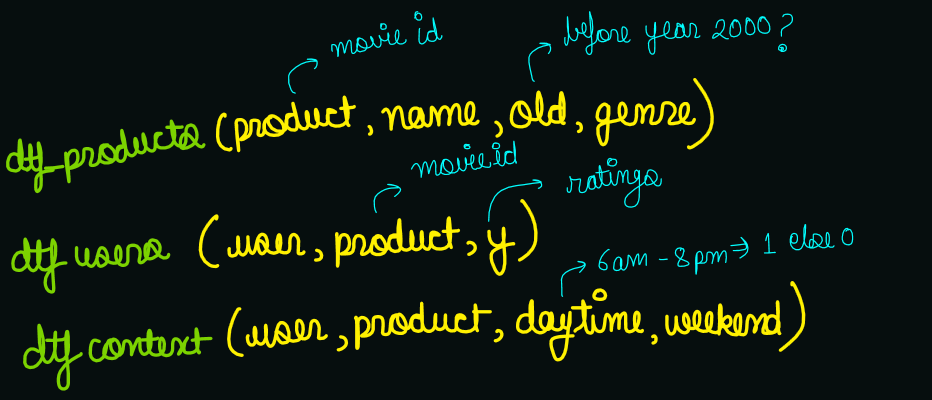

# Data Analysis

### products

In [20]:
tags = [i.split("|") for i in dtf_products["genres"].unique()]
columns = list(set([i for lst in tags for i in lst])) # all the genres
columns.remove('(no genres listed)')
print(columns)
print(len(columns))


['Fantasy', 'IMAX', 'Western', 'Thriller', 'War', 'Sci-Fi', 'Horror', 'Comedy', 'Musical', 'Adventure', 'Action', 'Documentary', 'Mystery', 'Film-Noir', 'Drama', 'Romance', 'Crime', 'Animation', 'Children']
19


In [21]:
# vector for all genre 

for col in columns:
    dtf_products[col] = dtf_products["genres"].apply(lambda x: 1 if col in x else 0)
dtf_products.head()

,name,old,genres,Fantasy,IMAX,Western,Thriller,War,Sci-Fi,Horror,...,Adventure,Action,Documentary,Mystery,Film-Noir,Drama,Romance,Crime,Animation,Children
product,,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1,Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,Jumanji,1,Adventure|Children|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Grumpier Old Men,1,Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Waiting to Exhale,1,Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,Father of the Bride Part II,1,Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


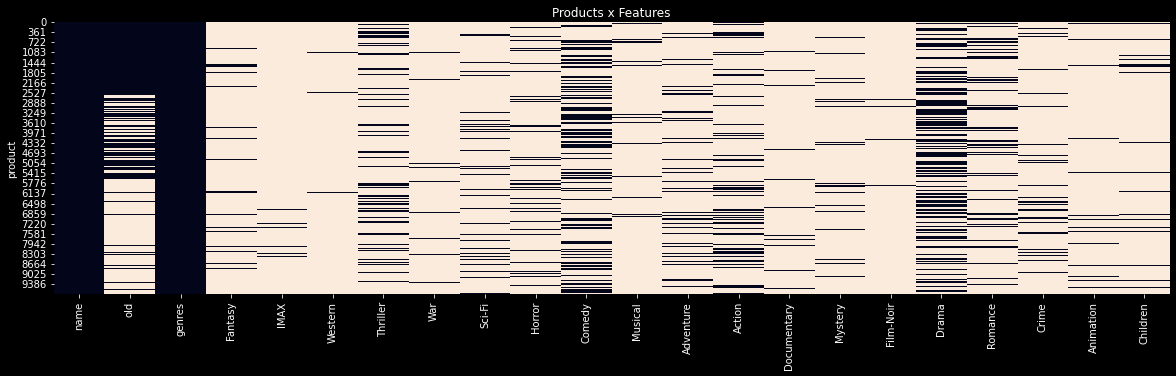

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_products==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")
plt.show()

### users


In [23]:
dtf_users.sample(5)


,user,product,y
9575,63,1031,4.0
8352,56,1649,5.0
958,6,3915,1.5
8779,60,3141,4.5
4465,27,3646,4.5


In [24]:
dtf_users.groupby("user").count() # kis user ne kitni movies rate ki hai


,product,y
user,,
0,232,232
1,29,29
2,39,39
3,216,216
4,44,44
...,...,...
61,366,366
62,271,271
63,517,517


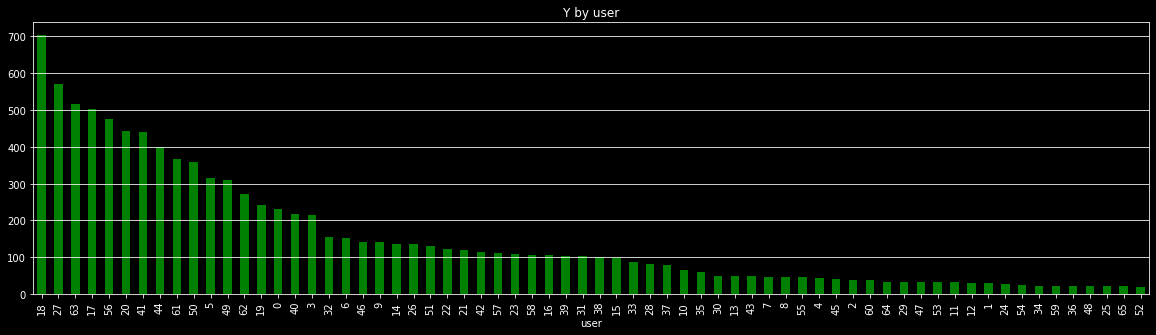

In [25]:
dtf_users.groupby("user").count()["product"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

In [26]:
dtf_users["y"].value_counts() # ratings ka count


4.0    2643
3.0    2093
5.0    1664
3.5    1065
2.0     903
4.5     683
2.5     406
1.0     287
0.5     152
1.5     104
Name: y, dtype: int64

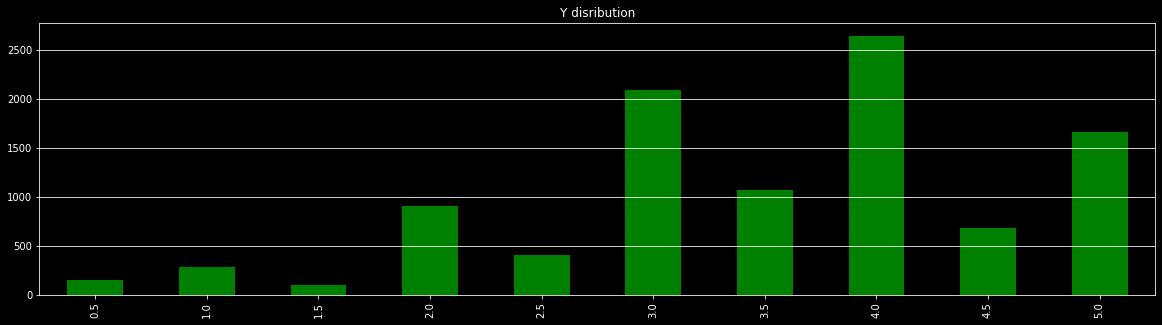

In [27]:
dtf_users["y"].value_counts().sort_index().plot(kind="bar", color="green", title="Y disribution",
                                                figsize=(20, 5)).grid(axis='y')
plt.show()


In [28]:
tmp = dtf_users.copy()
dtf_users = tmp.pivot_table(index="user", columns="product", values="y")
dtf_users

product,0,1,2,3,4,5,6,7,9,10,...,9667,9680,9691,9699,9701,9707,9708,9709,9712,9723
user,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,4.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,4.0,4.0,3.5,4.5,5.0,NaN,4.0,4.0,NaN,NaN
62,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,4.0,NaN,3.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
missing_cols = list(set(dtf_products.index) - set(dtf_users.columns))

for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users # kis user ne kis movie ko kitni ratings di hai


product,0,1,2,3,4,5,6,7,8,9,...,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740
user,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,4.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,4.0,NaN,3.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


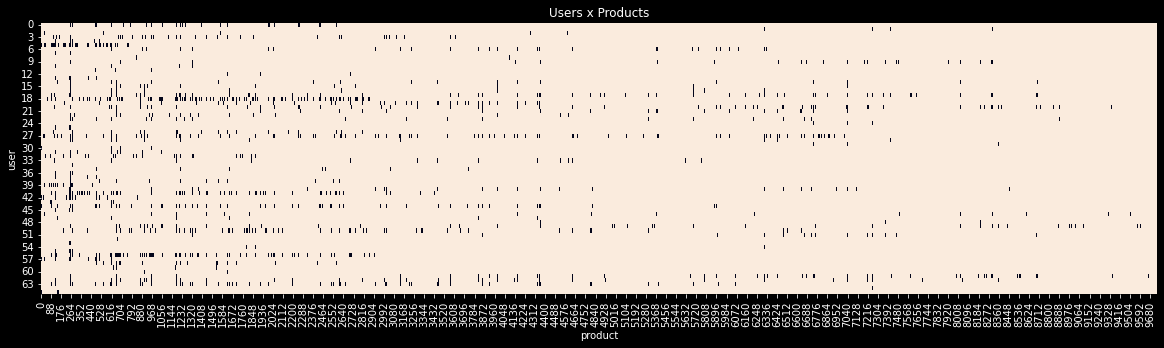

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(dtf_users.isnull(), vmin=0, vmax=1, cbar=False,
            ax=ax).set_title("Users x Products")
plt.show()


### context


In [31]:
dtf_context["weekend"].value_counts() # kitni movies saturday-sunday ko dekhi? 2468


0    7532
1    2468
Name: weekend, dtype: int64

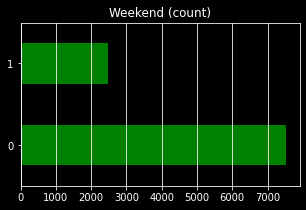

In [32]:
dtf_context["weekend"].value_counts().plot(kind="barh", color="green", title="Weekend (count)",
                                           figsize=(5, 3)).grid(axis='x')
plt.show()


In [33]:
dtf_context.daytime.value_counts()

1    5069
0    4931
Name: daytime, dtype: int64

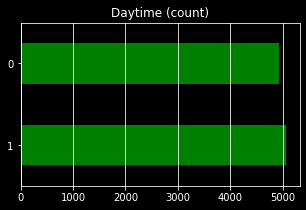

In [34]:
dtf_context["daytime"].value_counts().plot(kind="barh", color="green", title="Daytime (count)",
                                           figsize=(5, 3)).grid(axis='x')
plt.show()


# Pre Processing

- Scaling
- Partitioning

scaling

In [35]:
dtf_users = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5, 1)).fit_transform(dtf_users.values),
                         columns=dtf_users.columns, index=dtf_users.index) # 0 se 1 kyu nhi kiya?
dtf_users


product,0,1,2,3,4,5,6,7,8,9,...,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740
user,,,,,,,,,,,,,,,,,,,,,
0,0.8,NaN,0.750,NaN,NaN,0.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,0.833333,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0.8,NaN,0.625,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


partitioning

In [36]:
split = int(0.8*dtf_users.shape[1])
split # test train split


7792

In [37]:
# Train
dtf_train = dtf_users.loc[:, :split-1]
print("non-null data:", dtf_train[dtf_train > 0].count().sum())
print(dtf_train.shape)  # (66 ---> users , 7792---> movies) 
dtf_train


non-null data: 9329
(66, 7792)


product,0,1,2,3,4,5,6,7,8,9,...,7782,7783,7784,7785,7786,7787,7788,7789,7790,7791
user,,,,,,,,,,,,,,,,,,,,,
0,0.8,NaN,0.750,NaN,NaN,0.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,0.833333,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0.8,NaN,0.625,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Test
dtf_test = dtf_users.loc[:, split:]
print("non-null data:", dtf_test[dtf_test > 0].count().sum())
print(dtf_test.shape)  # (66 ---> users , 1949 ---> movies)

dtf_test


non-null data: 671
(66, 1949)


product,7792,7793,7794,7795,7796,7797,7798,7799,7800,7801,...,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


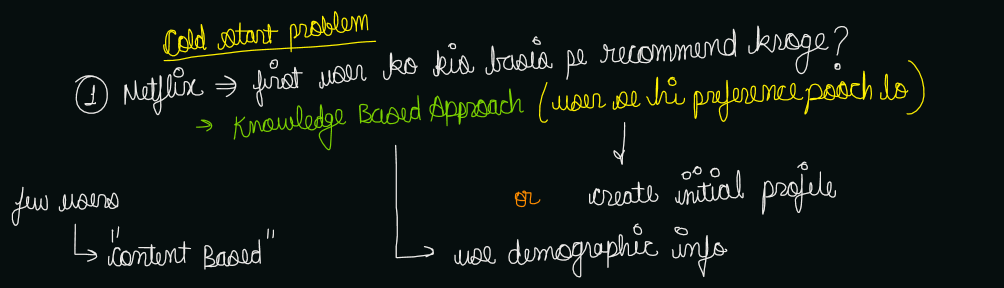

# Content Based
![img](https://miro.medium.com/v2/resize:fit:828/1*FOkxZ4feOf030nanWNZRmA.gif)

In [39]:
# Select a user
i = 1
train = dtf_train.iloc[i].to_frame(name="y")
test = dtf_test.iloc[i].to_frame(name="y")

print("train:", len(train[~train["y"].isna()]), "| test:", len(test[~test["y"].isna()]))
test.head(5)

train: 21 | test: 8


,y
product,
7792,NaN
7793,NaN
7794,NaN
7795,NaN
7796,NaN


In [40]:
# add all products in test but empty
# test se uthake train m append with NaN 
tmp = test.copy()
tmp["y"] = np.nan
train = train.append(tmp)
train.tail()


,y
product,
9736,NaN
9737,NaN
9738,NaN
9739,NaN
9740,NaN


In [41]:
train.shape

(9741, 1)

In [42]:
prd = dtf_products.drop(["name", "genres"], axis=1)
prd

,old,Fantasy,IMAX,Western,Thriller,War,Sci-Fi,Horror,Comedy,Musical,Adventure,Action,Documentary,Mystery,Film-Noir,Drama,Romance,Crime,Animation,Children
product,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9737,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
# x= train[["y"]].fillna(0).values
# x.shape  # (9741, 1)
# x.T.shape  # (1, 9741) ---> Transpose


In [43]:
# Model
usr = train[["y"]].fillna(0).values.T # array of shape (1(user), 9741(movies)) ---> row vector
prd = dtf_products.drop(["name", "genres"], axis=1).values # prd ---> (9741(movies), 20(features))
print("Users", usr.shape, " x  Products", prd.shape)


Users (1, 9741)  x  Products (9741, 20)


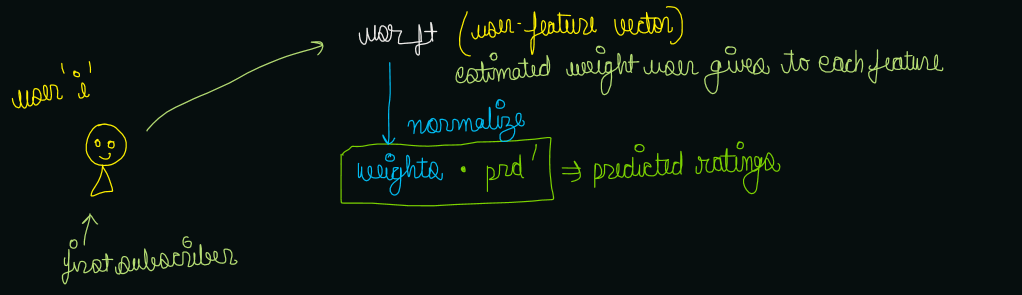

In [44]:
# Numpy
import numpy as np

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
usr_ft = np.dot(usr, prd)
## normalize
weights = usr_ft / usr_ft.sum()
## predicted rating(users,products) = weights(users,fatures) x prd.T(features,products)
pred = np.dot(weights, prd.T)

test = test.merge(pd.DataFrame(pred[0], columns=[
                  "yhat"]), how="left", left_index=True, right_index=True).reset_index()

test = test[~test["y"].isna()]
test


,product,y,yhat
271,8063,0.812500,0.364068
513,8305,1.000000,0.441084
584,8376,0.777778,0.077697
674,8466,0.800000,0.215465
717,8509,0.500000,0.477922
758,8550,0.875000,0.356925
889,8681,1.000000,0.327055
1036,8828,0.500000,0.033233


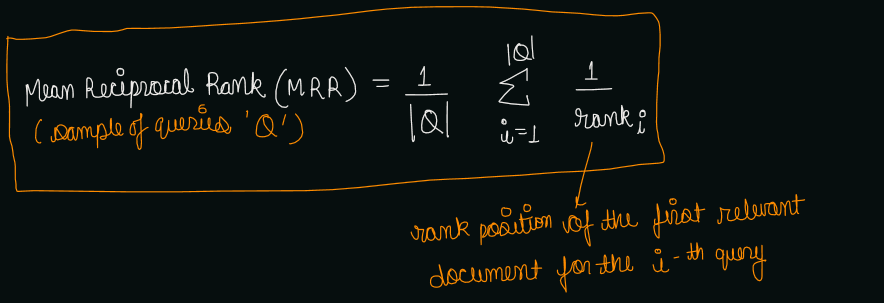

In [45]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) +
                   1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)


In [46]:
print("--- user", i, "---")

top = 5
y_test = test.sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test.sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8509 8305 8063 8550 8681]
true positive: 4 (80.0%)
accuracy: 0.0%
mrr: 0.26


In [47]:
test.merge(
    dtf_products[["name", "old", "genres"]], left_on="product", right_index=True
).sort_values("yhat", ascending=False)


,product,y,yhat,name,old,genres
717,8509,0.500000,0.477922,The Drop,0,Crime|Drama|Thriller
513,8305,1.000000,0.441084,"Wolf of Wall Street, The",0,Comedy|Crime|Drama
271,8063,0.812500,0.364068,Django Unchained,0,Action|Drama|Western
758,8550,0.875000,0.356925,Ex Machina,0,Drama|Sci-Fi|Thriller
889,8681,1.000000,0.327055,Mad Max: Fury Road,0,Action|Adventure|Sci-Fi|Thriller
674,8466,0.800000,0.215465,Whiplash,0,Drama
584,8376,0.777778,0.077697,Interstellar,0,Sci-Fi|IMAX
1036,8828,0.500000,0.033233,The Jinx: The Life and Deaths of Robert Durst,0,Documentary


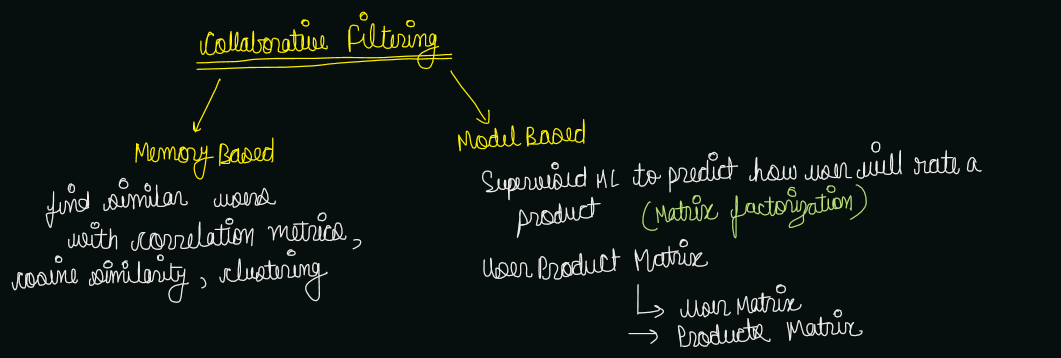

# Collaborative Filtering

![img](https://miro.medium.com/v2/resize:fit:828/1*ss7r5nIfCQJM_QepIugXgg.gif)


In [55]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0: "y"})
train.head()


,user,product,y
0,0,0,0.80
1,0,2,0.75
2,0,5,0.75
3,0,43,1.00
4,0,46,1.00


In [56]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0: "y"})
test.head()


,user,product,y
0,1,8063,0.812500
1,1,8305,1.000000
2,1,8376,0.777778
3,1,8466,0.800000
4,1,8509,0.500000


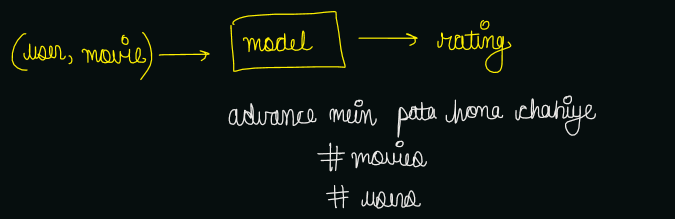

In [59]:
dtf_users.head(1)

product,0,1,2,3,4,5,6,7,8,9,...,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740
user,,,,,,,,,,,,,,,,,,,,,
0,0.8,NaN,0.75,NaN,NaN,0.75,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 xusers_emb (Embedding)         (None, 1, 50)        3300        ['xusers_in[0][0]']              
                                                                                                  
 xproducts_emb (Embedding)      (None, 1, 50)        487050      ['xproducts_in[0][0]']           
                                                                             

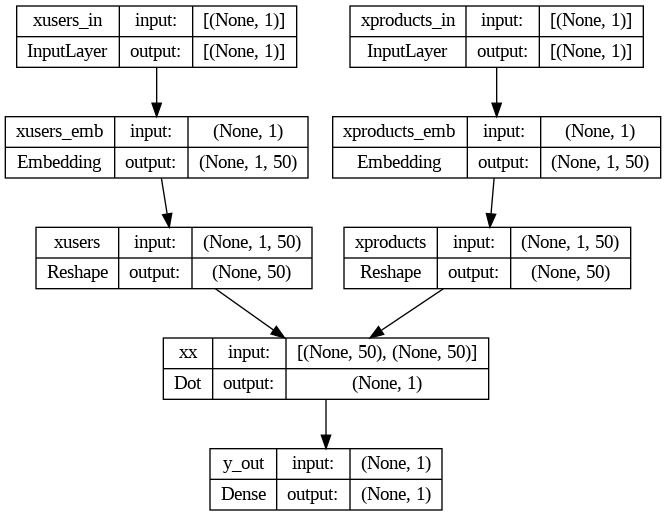

In [62]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

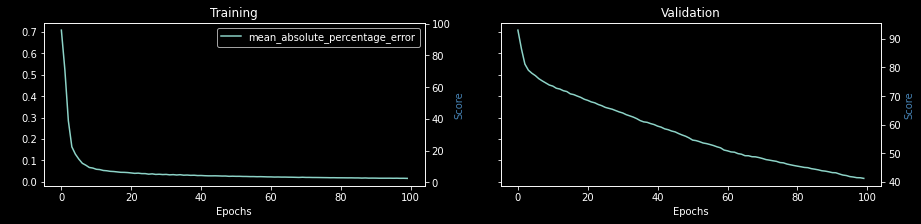

In [63]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)


In [64]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test


21/21 [==============================] - 0s 2ms/step


,user,product,y,yhat
0,1,8063,0.812500,0.277059
1,1,8305,1.000000,0.608630
2,1,8376,0.777778,0.471995
3,1,8466,0.800000,0.299525
4,1,8509,0.500000,0.427762
...,...,...,...,...
666,64,8023,0.500000,0.336042
667,64,8376,0.944444,0.649979
668,64,8438,0.666667,0.514624
669,64,8569,0.900000,0.712224


In [68]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.65%


In [72]:
abs(test.y-test.yhat).sum() / len(test)

0.24310922982736546

In [73]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8305 8681 8376 8509 8550]
true positive: 3 (60.0%)
accuracy: 40.0%
mrr: 0.34


In [74]:
test[test["user"] == i].merge(
    dtf_products[["name", "old", "genres"]], left_on="product", right_index=True
).sort_values("yhat", ascending=False)


,user,product,y,yhat,name,old,genres
1,1,8305,1.000000,0.608630,"Wolf of Wall Street, The",0,Comedy|Crime|Drama
6,1,8681,1.000000,0.539583,Mad Max: Fury Road,0,Action|Adventure|Sci-Fi|Thriller
2,1,8376,0.777778,0.471995,Interstellar,0,Sci-Fi|IMAX
4,1,8509,0.500000,0.427762,The Drop,0,Crime|Drama|Thriller
5,1,8550,0.875000,0.320326,Ex Machina,0,Drama|Sci-Fi|Thriller
3,1,8466,0.800000,0.299525,Whiplash,0,Drama
0,1,8063,0.812500,0.277059,Django Unchained,0,Action|Drama|Western
7,1,8828,0.500000,0.197945,The Jinx: The Life and Deaths of Robert Durst,0,Documentary


# Neural Collaborative Filtering

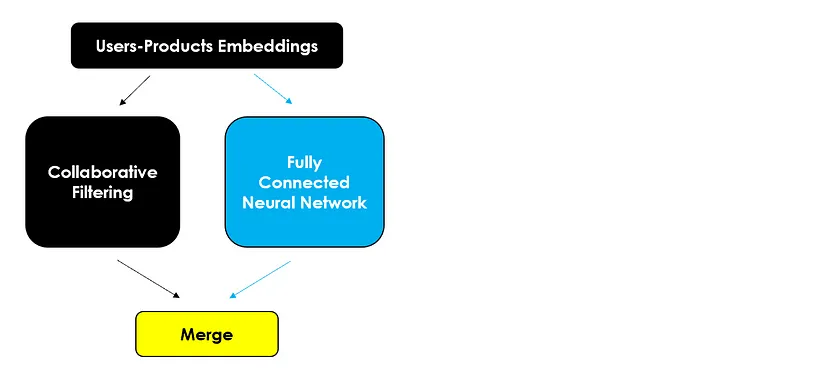

In [77]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0: "y"})
train.head()


,user,product,y
0,0,0,0.80
1,0,2,0.75
2,0,5,0.75
3,0,43,1.00
4,0,46,1.00


In [78]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0: "y"})
test.head()


,user,product,y
0,1,8063,0.812500
1,1,8305,1.000000
2,1,8376,0.777778
3,1,8466,0.800000
4,1,8509,0.500000


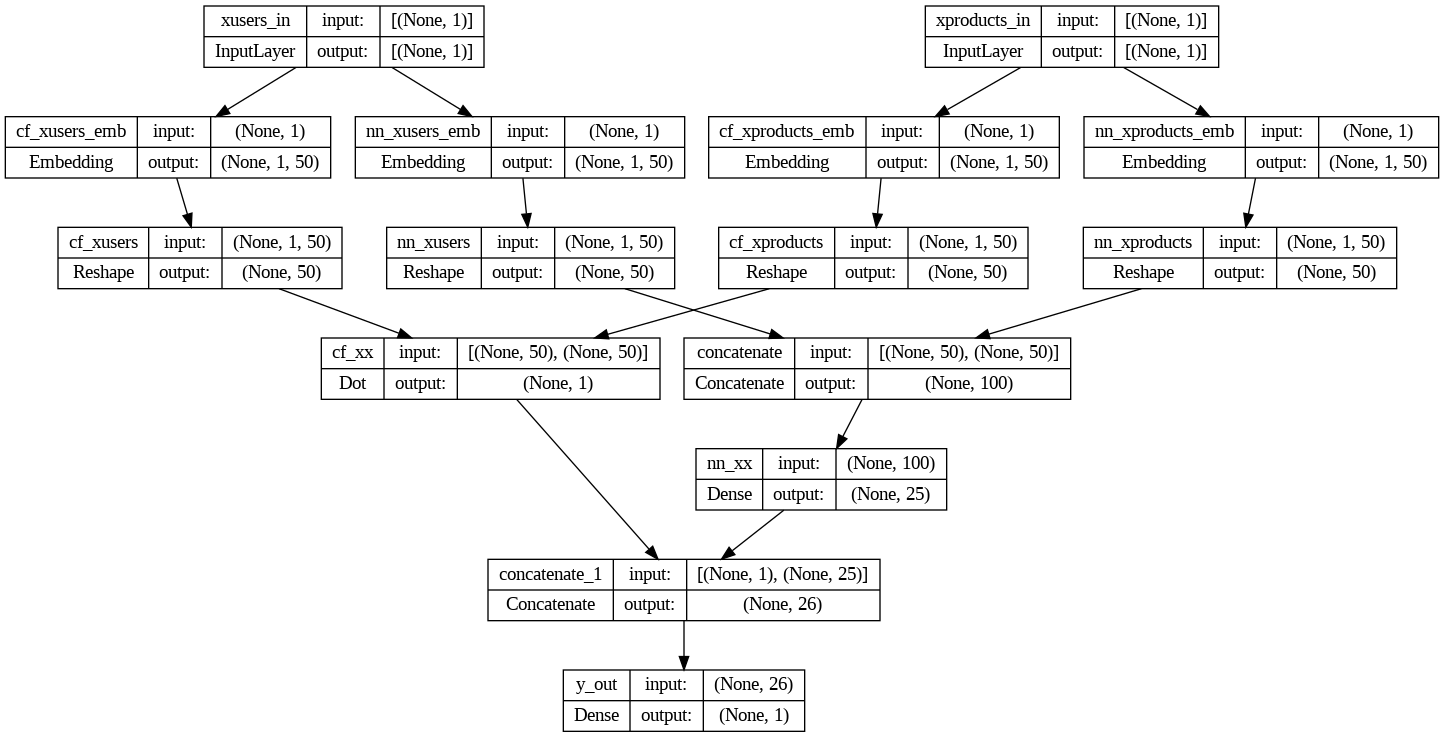

In [79]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

# Merge A & B
y_out = layers.Concatenate()([cf_xx, nn_xx])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="Neural_CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Neural_CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        3300        ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        487050      ['xproducts_in[0][0]']           
                                                                      

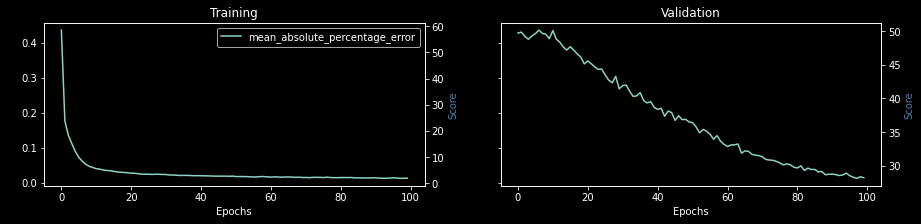

In [80]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)


In [81]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test


21/21 [==============================] - 0s 2ms/step


,user,product,y,yhat
0,1,8063,0.812500,0.814766
1,1,8305,1.000000,0.794925
2,1,8376,0.777778,0.617561
3,1,8466,0.800000,0.608265
4,1,8509,0.500000,0.687679
...,...,...,...,...
666,64,8023,0.500000,0.436257
667,64,8376,0.944444,0.514950
668,64,8438,0.666667,0.676678
669,64,8569,0.900000,0.431362


In [82]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.31%


In [84]:
abs(test.yhat-test.y).sum()/len(test)

0.1911405701569081

In [85]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8063 8305 8681 8550 8828]
true positive: 4 (80.0%)
accuracy: 0.0%
mrr: 0.42


In [86]:
test[test["user"]==i].merge(
        dtf_products[["name","old","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,user,product,y,yhat,name,old,genres
0,1,8063,0.812500,0.814766,Django Unchained,0,Action|Drama|Western
1,1,8305,1.000000,0.794925,"Wolf of Wall Street, The",0,Comedy|Crime|Drama
6,1,8681,1.000000,0.782460,Mad Max: Fury Road,0,Action|Adventure|Sci-Fi|Thriller
5,1,8550,0.875000,0.748524,Ex Machina,0,Drama|Sci-Fi|Thriller
7,1,8828,0.500000,0.707547,The Jinx: The Life and Deaths of Robert Durst,0,Documentary
4,1,8509,0.500000,0.687679,The Drop,0,Crime|Drama|Thriller
2,1,8376,0.777778,0.617561,Interstellar,0,Sci-Fi|IMAX
3,1,8466,0.800000,0.608265,Whiplash,0,Drama


# Hybrid Model

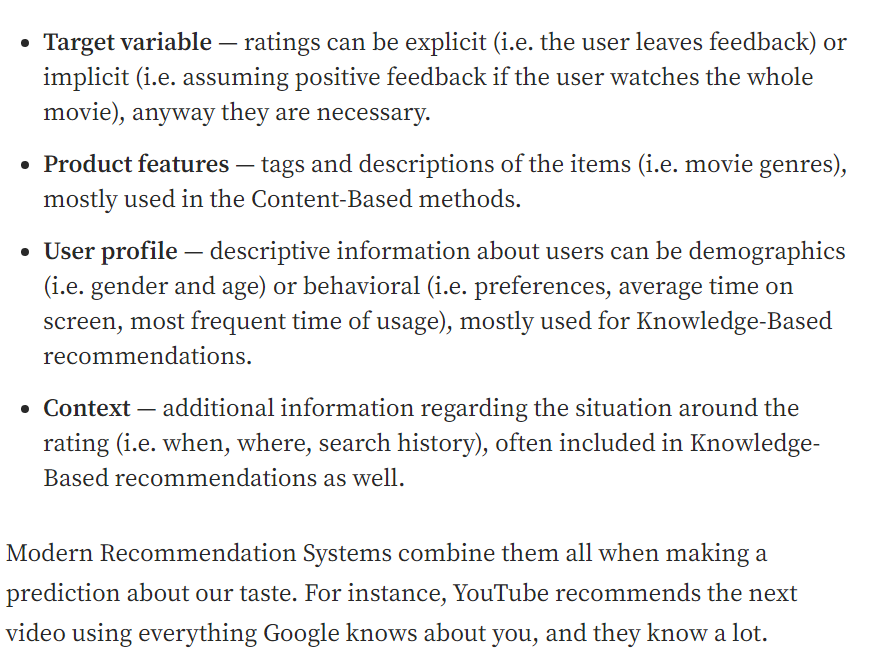

In [89]:
dtf_context.head()

,user,product,daytime,weekend
0,0,0,0,0
1,0,2,0,1
2,0,5,0,0
3,0,43,0,0
4,0,46,0,0


In [88]:
# Extra data
features = dtf_products.drop(["genres", "name"], axis=1).columns
print(features)

context = dtf_context.drop(["user", "product"], axis=1).columns
print(context)


Index(['old', 'Fantasy', 'IMAX', 'Western', 'Thriller', 'War', 'Sci-Fi',
       'Horror', 'Comedy', 'Musical', 'Adventure', 'Action', 'Documentary',
       'Mystery', 'Film-Noir', 'Drama', 'Romance', 'Crime', 'Animation',
       'Children'],
      dtype='object')
Index(['daytime', 'weekend'], dtype='object')


In [90]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0: "y"})

## add features
train = train.merge(dtf_products[features],
                    how="left", left_on="product", right_index=True)

## add context
train = train.merge(dtf_context, how="left")

train.head()


,user,product,y,old,Fantasy,IMAX,Western,Thriller,War,Sci-Fi,...,Documentary,Mystery,Film-Noir,Drama,Romance,Crime,Animation,Children,daytime,weekend
0,0,0,0.80,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,2,0.75,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,5,0.75,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,43,1.00,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,46,1.00,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [91]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0: "y"})

## add features
test = test.merge(dtf_products.drop(
    ["genres", "name"], axis=1), how="left", left_on="product", right_index=True)

## add context
test[context] = 0  # --> simulate production for a weekday night
#test = test.merge(dtf_context, how="left") #--> use test set

test.head()


,user,product,y,old,Fantasy,IMAX,Western,Thriller,War,Sci-Fi,...,Documentary,Mystery,Film-Noir,Drama,Romance,Crime,Animation,Children,daytime,weekend
0,1,8063,0.812500,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,8305,1.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,8376,0.777778,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,8466,0.800000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,8509,0.500000,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


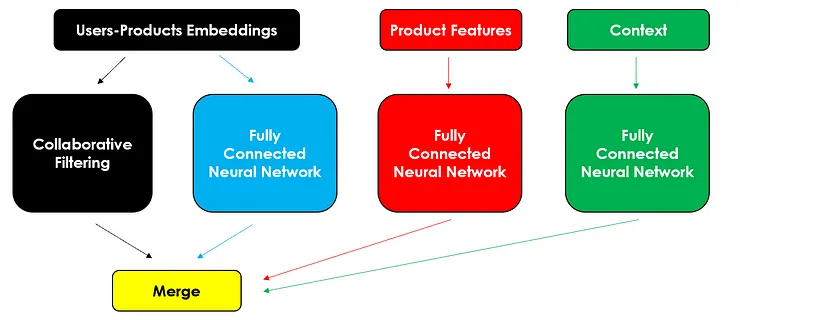

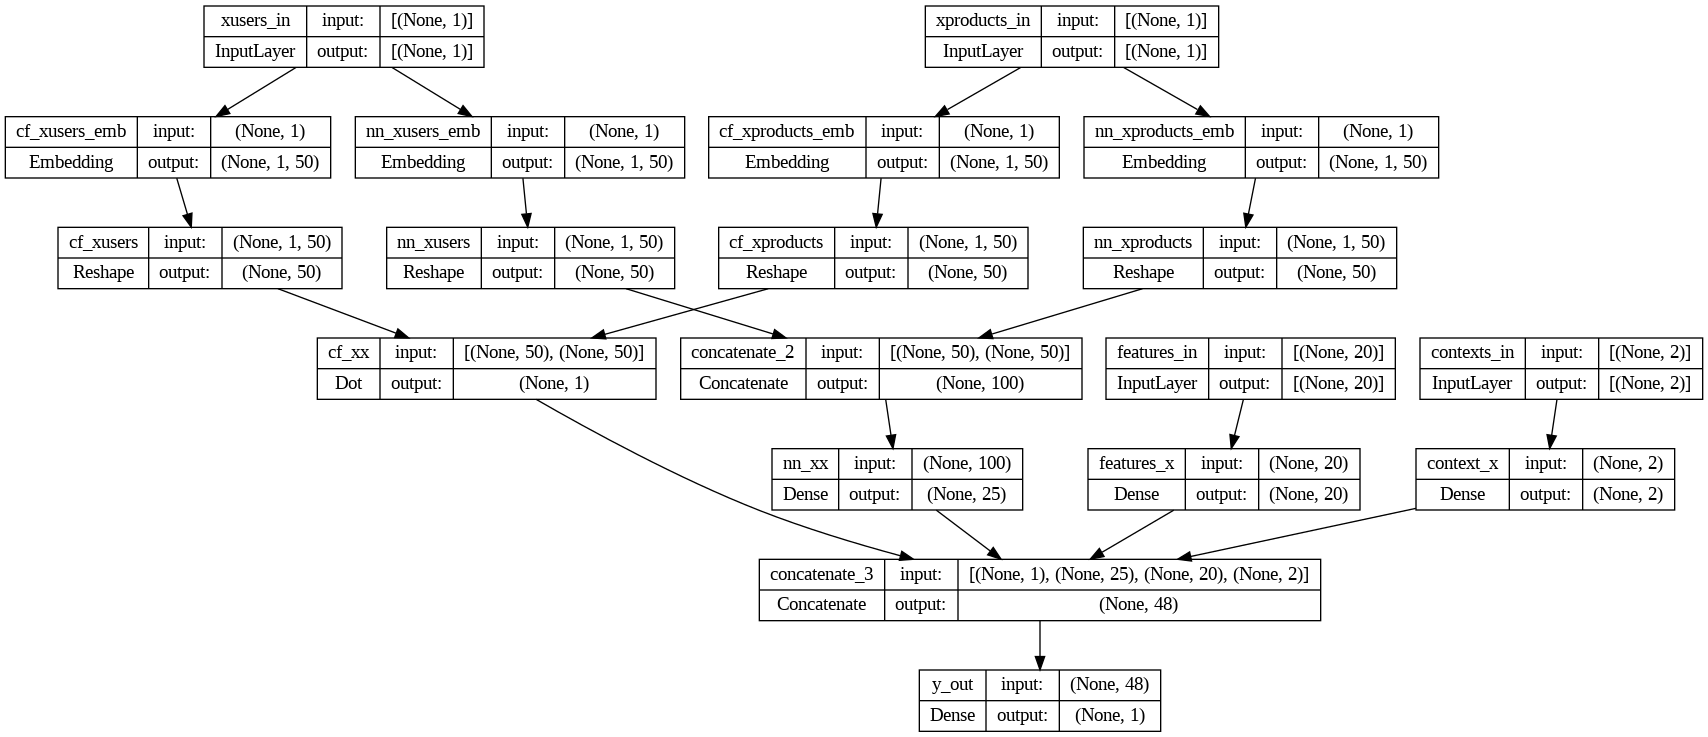

In [92]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]
feat = len(features)
ctx = len(context)

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

########################################## CONTENT BASED ###################################################
# Product Features
features_in = layers.Input(name="features_in", shape=(feat,))
features_x = layers.Dense(name="features_x", units=feat, activation='relu')(features_in)

########################################## KNOWLEDGE BASED #################################################
# Context
contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = layers.Dense(name="context_x", units=ctx, activation='relu')(contexts_in)

########################################## OUTPUT ###################################################
# Merge all
y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Hybrid_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        3300        ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        487050      ['xproducts_in[0][0]']           
                                                                                       

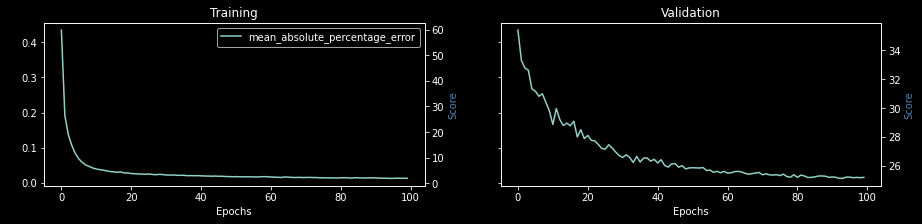

In [93]:
# train
training = model.fit(x=[train["user"], train["product"], train[features], train[context]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)


model= training.model
utils_plot_keras_training(training)

In [94]:
# test
test["yhat"] = model.predict([test["user"], test["product"], test[features], test[context]])
test

21/21 [==============================] - 0s 2ms/step


,user,product,y,old,Fantasy,IMAX,Western,Thriller,War,Sci-Fi,...,Mystery,Film-Noir,Drama,Romance,Crime,Animation,Children,daytime,weekend,yhat
0,1,8063,0.812500,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.594799
1,1,8305,1.000000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0.894304
2,1,8376,0.777778,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.825737
3,1,8466,0.800000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.720503
4,1,8509,0.500000,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0.697712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,64,8023,0.500000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.631949
667,64,8376,0.944444,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.581281
668,64,8438,0.666667,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.742963
669,64,8569,0.900000,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0.638175


In [95]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.3%


In [96]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8305 8376 8681 8466 8509]
true positive: 3 (60.0%)
accuracy: 20.0%
mrr: 0.32
